In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spec_exam import Gen_spec
from spec_tools import Photometry
import seaborn as sea
import re
from astropy.io import fits
from astropy.table import Table
from grizli import model as griz_model
from scipy.interpolate import interp1d
from spec_tools import Get_Sensitivity, Scale_model
import pysynphot as S
from time import time
import os
from glob import glob
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'


Couldn't `import tristars`.  Get it from https://github.com/gbrammer/tristars to enable improved blind astrometric matching with triangle asterisms.



In [4]:
sphotdb = pd.read_pickle('../../Quiescent_analysis/data/south_phot.pkl')
sf_list=[]
for i in sphotdb.columns:
    if i[0] == 'f':
        sf_list.append(i)

In [11]:
sp =Gen_spec(41520,g102_min=8300)

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_exam.py:226: RuntimeWarning: invalid value encountered in sqrt
  weight = np.exp(-(1*np.abs(BEAM.contam)*np.sqrt(ivar)))
/Users/Vince.ec/miniconda3/envs/astroco

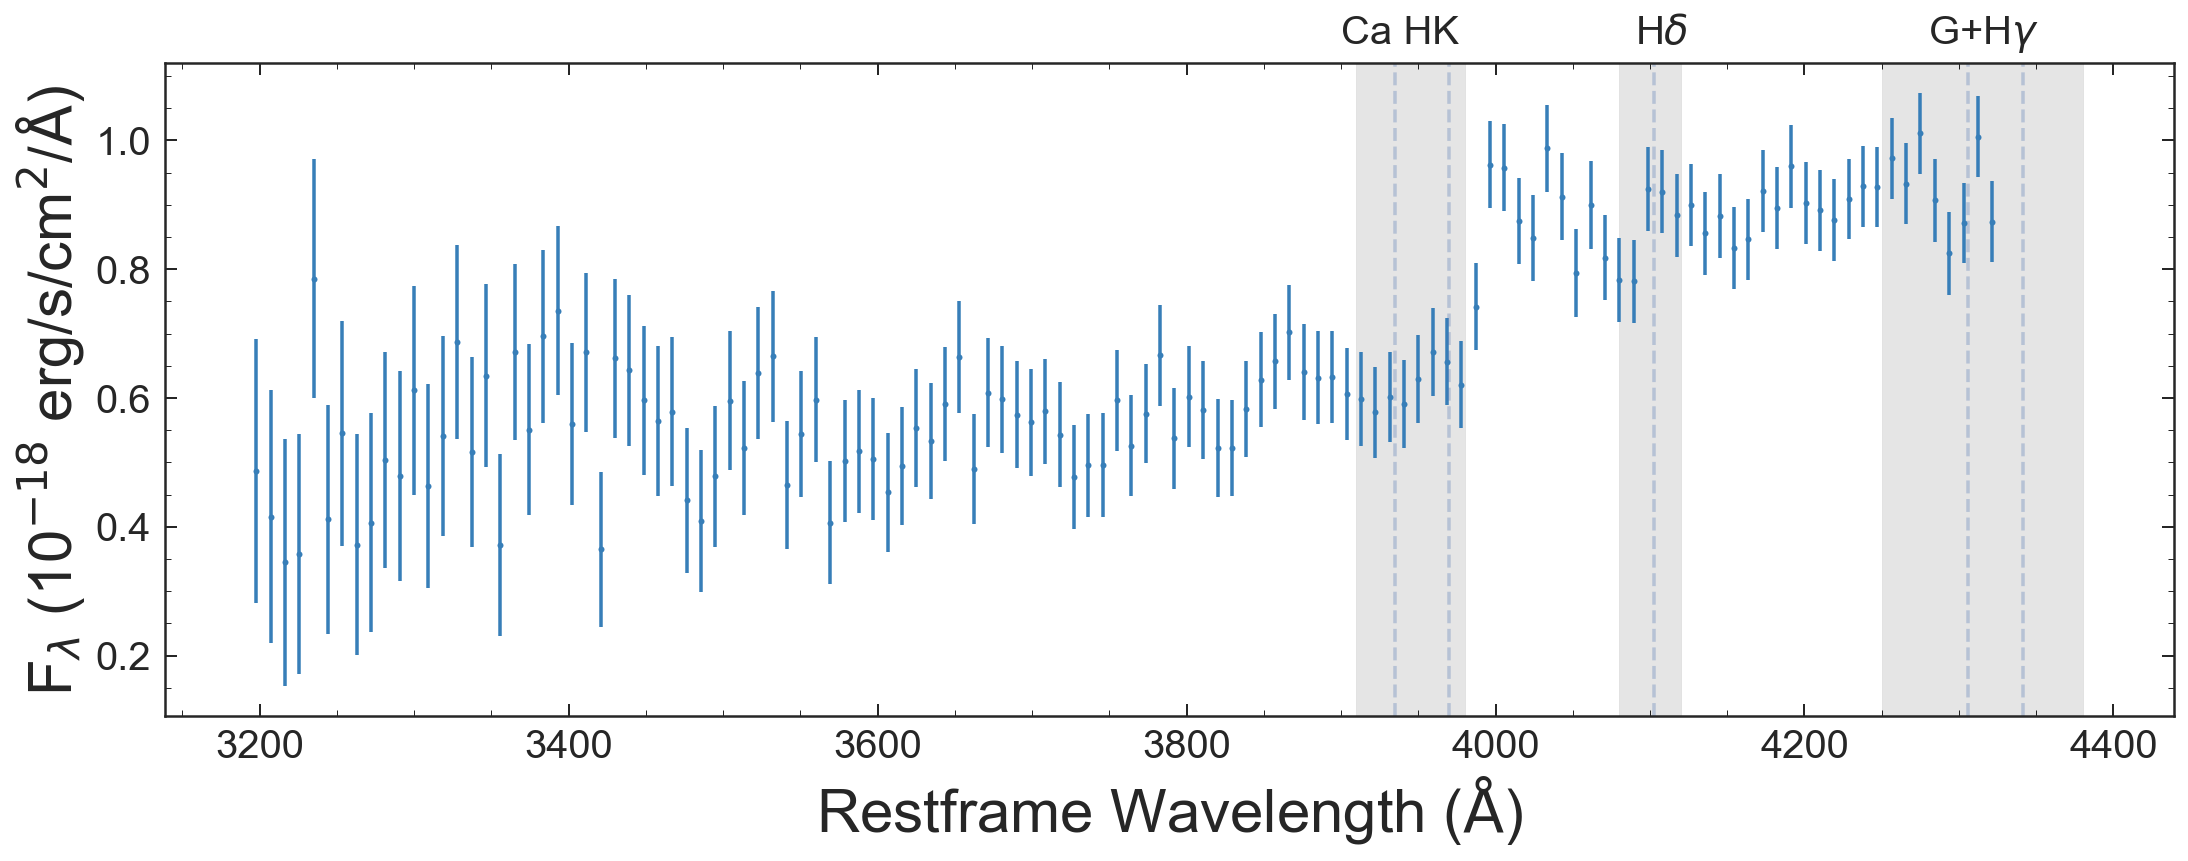

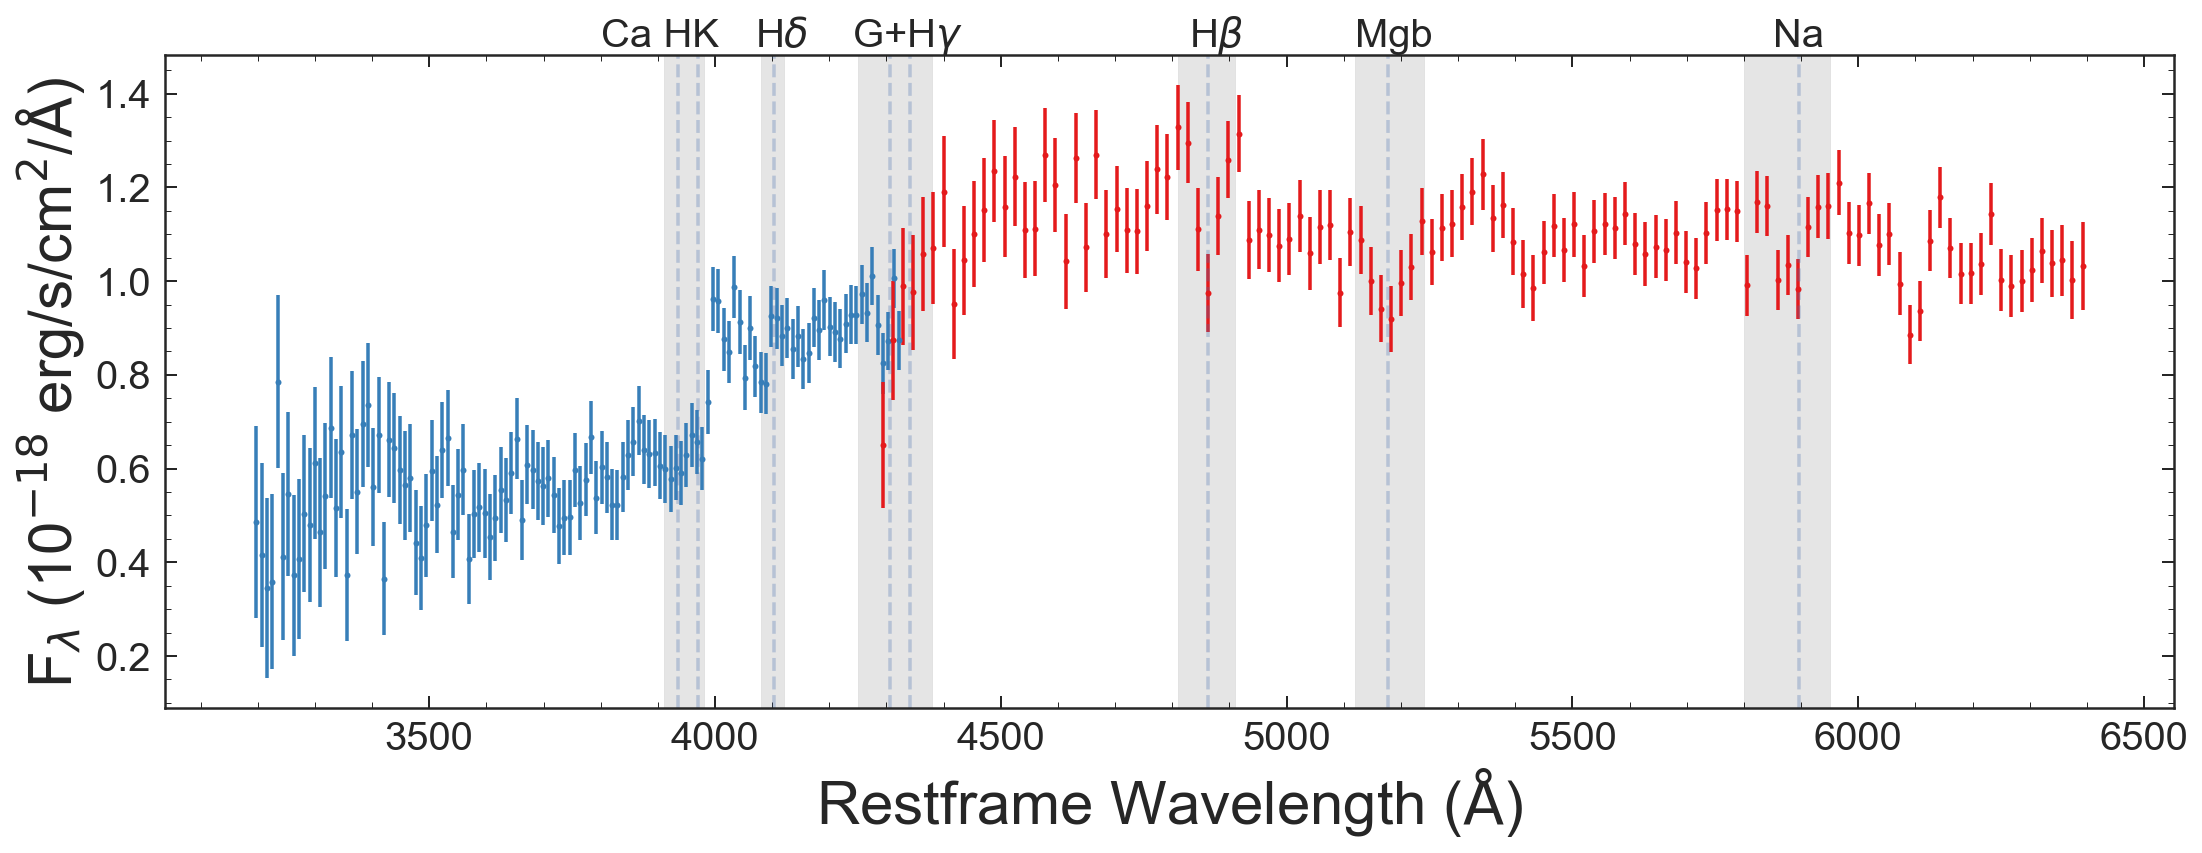

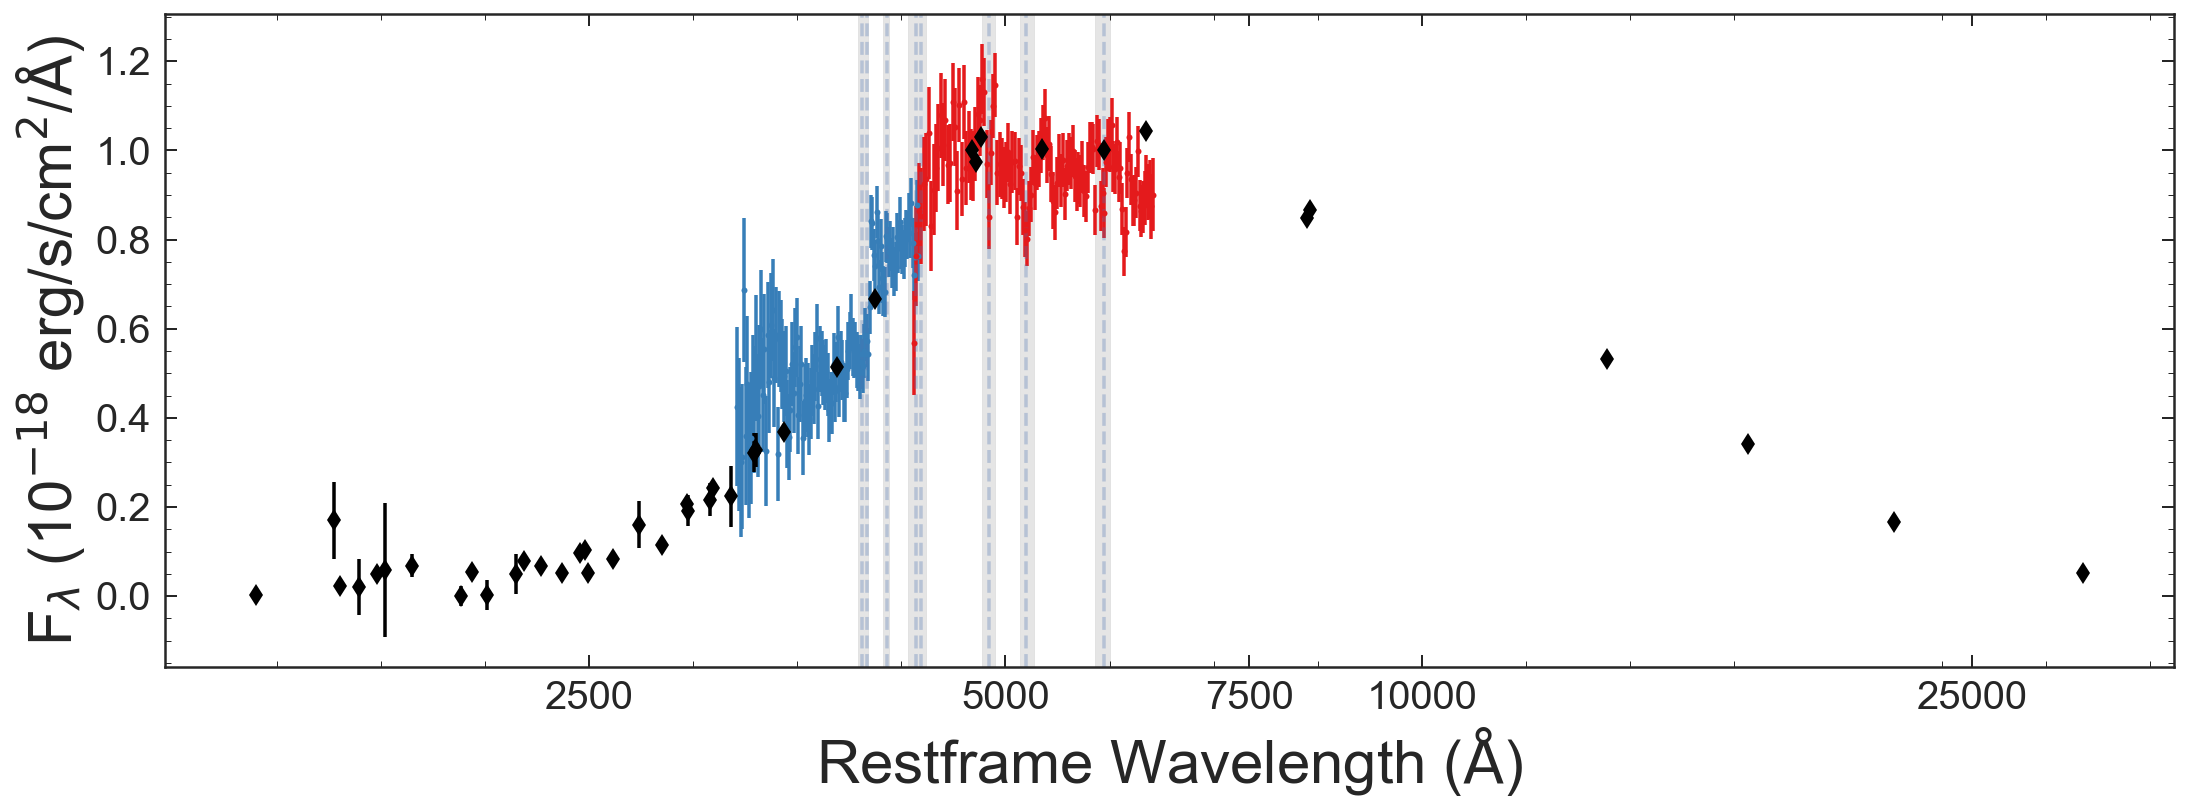

In [22]:
plt.figure(figsize=[18,6])
plt.errorbar(sp.g102_wv /2.605,sp.g102_fl*1E18,sp.g102_er*1E18,linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.axvline(3934.777,linestyle='--', alpha=.3)
plt.axvline(3969.588,linestyle='--', alpha=.3)
plt.axvline(4102.89,linestyle='--', alpha=.3)
plt.axvline(4305.61,linestyle='--', alpha=.3)
plt.axvline(4341.68,linestyle='--', alpha=.3)
plt.axvspan(3910, 3980, color='k', alpha=.1)
plt.axvspan(4080, 4120, color='k', alpha=.1)
plt.axvspan(4250, 4380, color='k', alpha=.1)
plt.text(3900,1.15,'Ca HK',fontsize=20)
plt.text(4090,1.15,'H$\delta$',fontsize=20)
plt.text(4280,1.15,'G+H$\gamma$',fontsize=20)
plt.ylabel('F$_\lambda$ (10$^{-18}$ erg/s/cm$^2$/$\\rm \AA$)',size=30)
plt.xlabel('Restframe Wavelength ($\\rm \AA$)',size=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('../plots/g102_spec.png',bbox_inches = 'tight')

plt.figure(figsize=[18,6])
plt.errorbar(sp.g102_wv /2.605,sp.g102_fl*1E18,sp.g102_er*1E18,linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(sp.g141_wv /2.605,sp.g141_fl*1E18,sp.g141_er*1E18,linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.axvline(3934.777,linestyle='--', alpha=.3)
plt.axvline(3969.588,linestyle='--', alpha=.3)
plt.axvline(4102.89,linestyle='--', alpha=.3)
plt.axvline(4305.61,linestyle='--', alpha=.3)
plt.axvline(4341.68,linestyle='--', alpha=.3)
plt.axvline(4862.68,linestyle='--', alpha=.3)
plt.axvline(5176.7,linestyle='--', alpha=.3)
plt.axvline(5895.6,linestyle='--', alpha=.3)
plt.axvspan(3910, 3980, color='k', alpha=.1)
plt.axvspan(4080, 4120, color='k', alpha=.1)
plt.axvspan(4250, 4380, color='k', alpha=.1)
plt.axvspan(4810, 4910, color='k', alpha=.1)
plt.axvspan(5120, 5240, color='k', alpha=.1)
plt.axvspan(5800, 5950, color='k', alpha=.1)
plt.text(3800,1.5,'Ca HK',fontsize=20)
plt.text(4070,1.5,'H$\delta$',fontsize=20)
plt.text(4240,1.5,'G+H$\gamma$',fontsize=20)
plt.text(4830,1.5,'H$\\beta$',fontsize=20)
plt.text(5120,1.5,'Mgb',fontsize=20)
plt.text(5850,1.5,'Na',fontsize=20)
plt.ylabel('F$_\lambda$ (10$^{-18}$ erg/s/cm$^2$/$\\rm \AA$)',size=30)
plt.xlabel('Restframe Wavelength ($\\rm \AA$)',size=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('../plots/g102_g141_spec.png',bbox_inches = 'tight')


phot = Photometry(sp.stack_wv,sp.stack_fl,sp.stack_er,203)
phot.Get_Sensitivity()
phot.Photo()
Clam = 3E18 / sphotdb['f_F125W'][0] **2 * 10**((-1.1)/2.5-29)
mod = Clam*sphotdb['f_F125W'][41519]

plt.figure(figsize=[18,6])
plt.errorbar(np.log10(sp.g102_wv /2.605),sp.g102_fl*1E18 * (mod/phot.photo),
             sp.g102_er*1E18 * (mod/phot.photo),linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(np.log10(sp.g141_wv /2.605),sp.g141_fl*1E18 * (mod/phot.photo),
             sp.g141_er*1E18 * (mod/phot.photo),linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.axvline(np.log10(3934.777),linestyle='--', alpha=.3)
plt.axvline(np.log10(3969.588),linestyle='--', alpha=.3)
plt.axvline(np.log10(4102.89),linestyle='--', alpha=.3)
plt.axvline(np.log10(4305.61),linestyle='--', alpha=.3)
plt.axvline(np.log10(4341.68),linestyle='--', alpha=.3)
plt.axvline(np.log10(4862.68),linestyle='--', alpha=.3)
plt.axvline(np.log10(5176.7),linestyle='--', alpha=.3)
plt.axvline(np.log10(5895.6),linestyle='--', alpha=.3)
plt.axvspan(np.log10(3910), np.log10(3980), color='k', alpha=.1)
plt.axvspan(np.log10(4080), np.log10(4120), color='k', alpha=.1)
plt.axvspan(np.log10(4250), np.log10(4380), color='k', alpha=.1)
plt.axvspan(np.log10(4810), np.log10(4910), color='k', alpha=.1)
plt.axvspan(np.log10(5120), np.log10(5240), color='k', alpha=.1)
plt.axvspan(np.log10(5800), np.log10(5950), color='k', alpha=.1)
plt.ylabel('F$_\lambda$ (10$^{-18}$ erg/s/cm$^2$/$\\rm \AA$)',size=30)
plt.xlabel('Restframe Wavelength ($\\rm \AA$)',size=30)
plt.tick_params(axis='both', which='major', labelsize=20)
for ii in sf_list:
    Clam = 3E18 / sphotdb[ii][0] **2 * 10**((-1.1)/2.5-29)
    if sphotdb[ii][41519] > 0:
        plt.errorbar(np.log10(sphotdb[ii][0]/2.605),Clam*sphotdb[ii][41519]*1E18,Clam*sphotdb['e' + ii[1:]][41519]*1E18,
                             linestyle='None', marker='d', markersize=8, color='k')
plt.xticks(np.log10(np.array([2500,5000,7500,10000,25000])),[2500,5000,7500,10000,25000])
plt.savefig('../plots/g102_g141_phot_spec.png',bbox_inches = 'tight')


In [2]:
goods_s=Table.read(hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat',format='ascii').to_pandas()
miniphot = goods_s[goods_s.id == 39845]

In [3]:
f_s = []
e_s = []

for i in miniphot.columns:
    if i[0:2] == 'f_':
        f_s.append(i)
    if i[0:2] == 'e_':
        e_s.append(i)

In [4]:
s_trans = np.loadtxt('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Eazy/goodss_3dhst.v4.1.translate',dtype='str').T

extra = [105,201,202,183,184,193,197]
u = 0

f_num_s = []
for i in f_s:
    try:
        f_num_s.append(int(s_trans[1][np.argwhere(s_trans[0] == i)[0][0]][1:]))
    except:
        f_num_s.append(extra[u])
        u+=1

In [5]:
wv,fl = np.load(hpath + 'fsps_models_for_fit/fsps_spec/m0.019_a2.0_dt0_spec.npy')
er = np.ones(len(wv))

In [6]:
phot = Photometry(wv,fl,er,1)

s_eff_wv = []

for i in f_num_s:
    phot.Get_Sensitivity(i)
    phot.Photo()
    s_eff_wv.append(phot.eff_wv)


In [8]:
s_photo_list = {'gids':miniphot.id} 
for i in range(len(f_s)):
    s_photo_list[f_s[i]] = miniphot[f_s[i]].values
    s_photo_list[e_s[i]] = miniphot[e_s[i]].values

In [9]:
miniphotdb = pd.DataFrame(s_photo_list)
effwv_list_s = {'gids' : 'eff_wv'}

for i in range(len(s_eff_wv)):
    effwv_list_s[f_s[i]] = [s_eff_wv[i]]
    effwv_list_s[e_s[i]] = [s_eff_wv[i]]
miniphotdb = miniphotdb.append(pd.DataFrame(effwv_list_s),ignore_index=False)


In [10]:
mf_list=[]
for i in miniphotdb.columns:
    if i[0] == 'f':
        mf_list.append(i)

In [14]:
miniphotdb

,e_B,e_F098M,e_F105W,e_F125W,e_F140W,e_F160W,e_F435W,e_F606W,e_F606Wcand,e_F775W,...,f_Ks,f_R,f_Rc,f_U,f_U38,f_U50,f_V,f_tenisJ,f_tenisK,gids
39844,0.030468,0.043448,-99.00000,0.070552,0.097988,0.054224,0.023543,0.019022,-99.000000,0.031141,...,-0.465031,0.135075,0.167332,0.089535,0.011334,0.125721,0.091929,0.190265,0.199745,39845
0,4575.176509,9840.877482,10475.92199,12409.718601,13830.660535,15351.344722,4298.072291,5842.073355,5843.900138,7668.292651,...,21638.252425,6417.607881,6464.700932,3742.285118,3682.145363,3600.082720,5359.540830,12512.531568,21534.133751,eff_wv


In [18]:
sp =Gen_spec(39485,g102_min=9000,g102_max=11200, g141_max=14500)


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.7.0-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3449: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.7.0-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3454: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.7.0-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3455: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_exam.py:226: RuntimeWarning: invalid value encountered in sqrt
  weight = np.exp(-(1*np.abs(BEAM.contam)*np.sqrt(ivar)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-

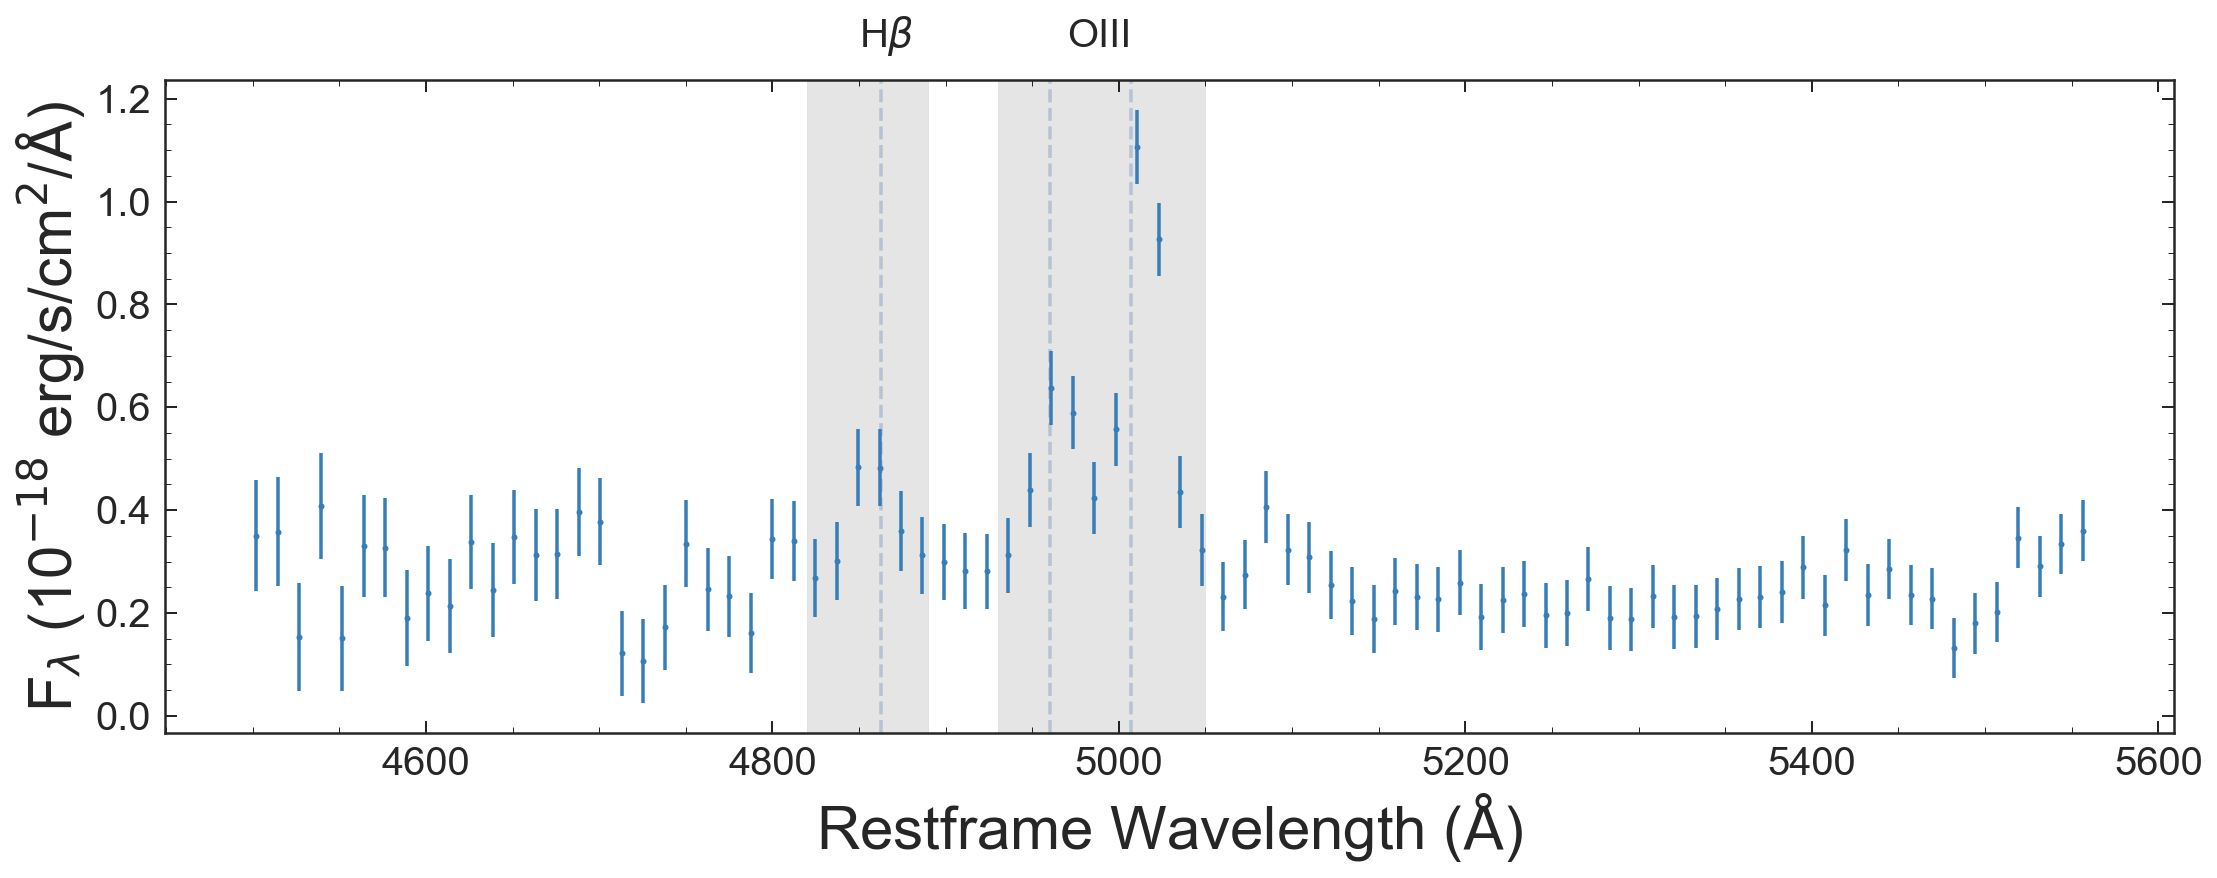

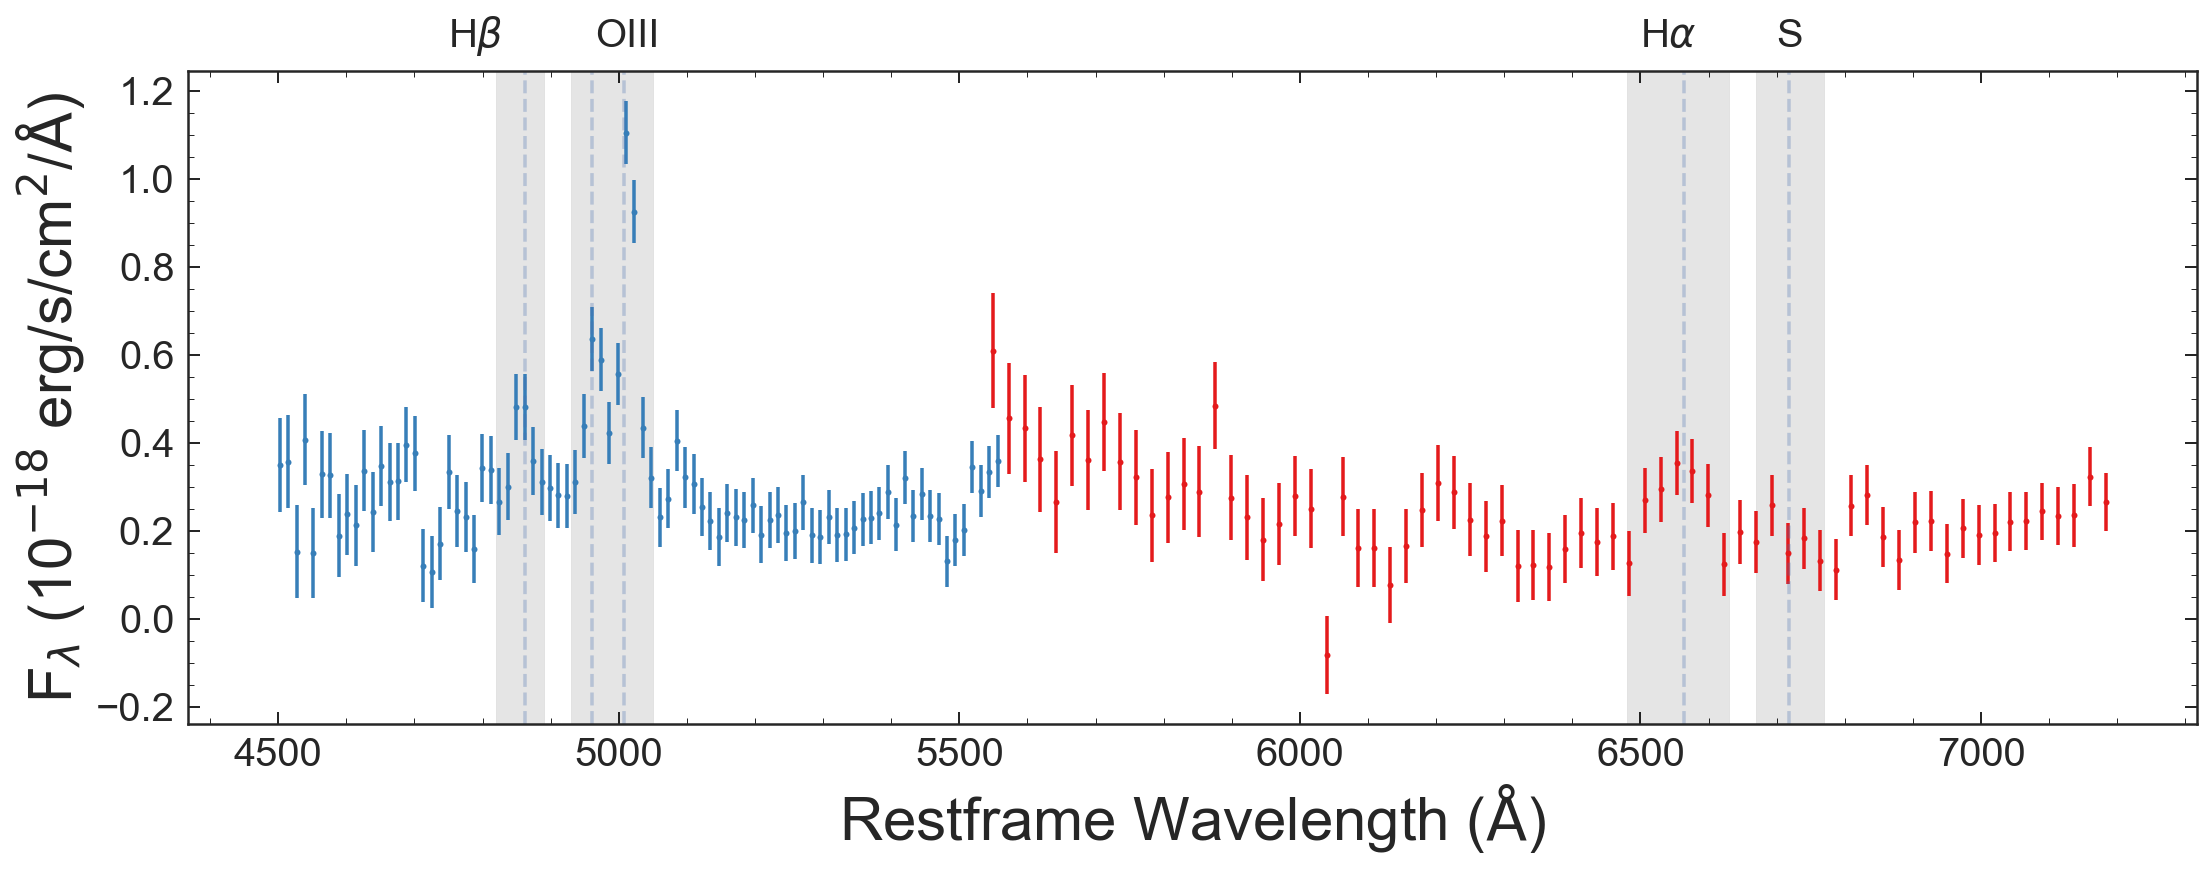

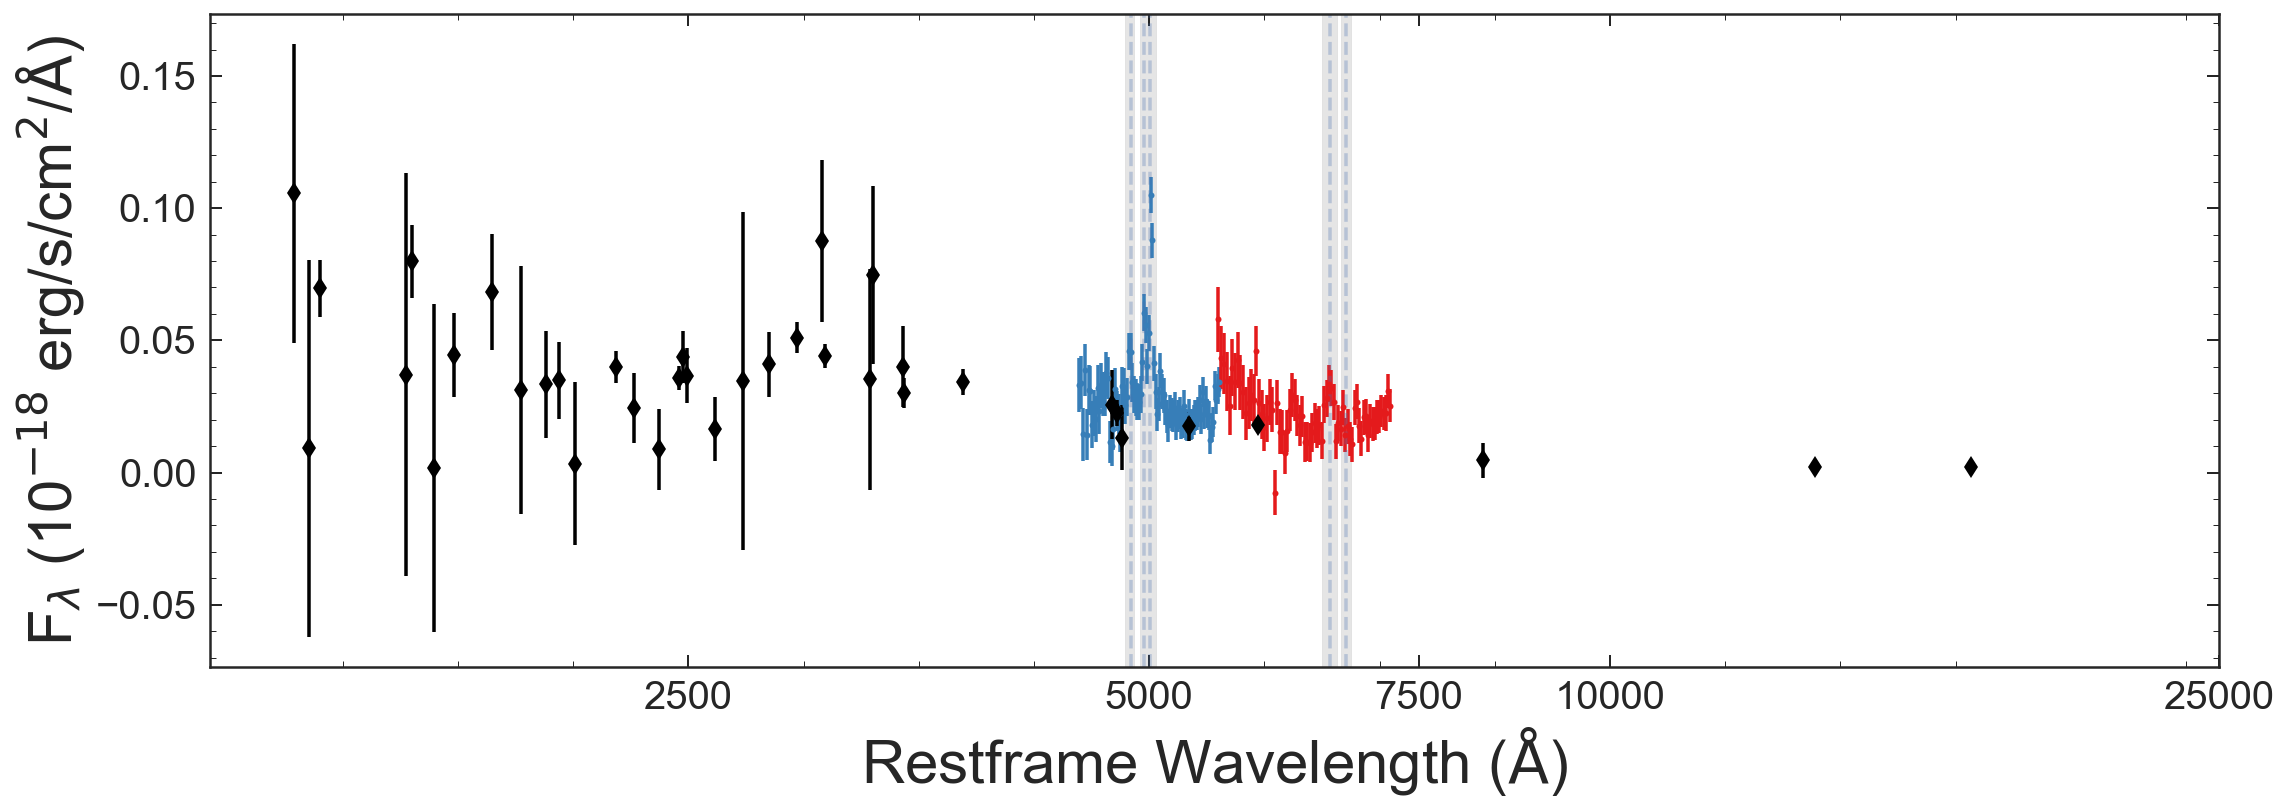

In [20]:
plt.figure(figsize=[18,6])
plt.errorbar(sp.g102_wv /2.01,sp.g102_fl*1E18,sp.g102_er*1E18,linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.axvline(4862.68,linestyle='--', alpha=.3)
plt.axvline(4960,linestyle='--', alpha=.3)
plt.axvline(5007,linestyle='--', alpha=.3)
plt.axvspan(4820, 4890, color='k', alpha=.1)
plt.axvspan(4930,5050, color='k', alpha=.1)
plt.text(4850,1.3,'H$\\beta$',fontsize=20)
plt.text(4970,1.3,'OIII',fontsize=20)
plt.ylabel('F$_\lambda$ (10$^{-18}$ erg/s/cm$^2$/$\\rm \AA$)',size=30)
plt.xlabel('Restframe Wavelength ($\\rm \AA$)',size=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('../plots/g102_spec_SF.png',bbox_inches = 'tight')

plt.figure(figsize=[18,6])
plt.errorbar(sp.g102_wv /2.01,sp.g102_fl*1E18,sp.g102_er*1E18,linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(sp.g141_wv /2.01,sp.g141_fl*1E18,sp.g141_er*1E18,linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.axvline(4862.68,linestyle='--', alpha=.3)
plt.axvline(4960,linestyle='--', alpha=.3)
plt.axvline(5007,linestyle='--', alpha=.3)
plt.axvline(6564.61,linestyle='--', alpha=.3)
plt.axvline(6718,linestyle='--', alpha=.3)
plt.axvspan(4820, 4890, color='k', alpha=.1)
plt.axvspan(4930,5050, color='k', alpha=.1)
plt.axvspan(6480,6630, color='k', alpha=.1)
plt.axvspan(6670,6770, color='k', alpha=.1)
plt.text(4750,1.3,'H$\\beta$',fontsize=20)
plt.text(4965,1.3,'OIII',fontsize=20)
plt.text(6500,1.3,'H$\\alpha$',fontsize=20)
plt.text(6700,1.3,'S',fontsize=20)
plt.ylabel('F$_\lambda$ (10$^{-18}$ erg/s/cm$^2$/$\\rm \AA$)',size=30)
plt.xlabel('Restframe Wavelength ($\\rm \AA$)',size=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('../plots/g102_g141_spec_SF.png',bbox_inches = 'tight')


phot = Photometry(sp.stack_wv,sp.stack_fl,sp.stack_er,203)
phot.Get_Sensitivity()
phot.Photo()
Clam = 3E18 / miniphotdb['f_F125W'][0] **2 * 10**((-1.1)/2.5-29)
mod = Clam*miniphotdb['f_F125W'][39844]

plt.figure(figsize=[18,6])
plt.errorbar(np.log10(sp.g102_wv /2.01),sp.g102_fl*1E18 * (mod/phot.photo),
             sp.g102_er*1E18 * (mod/phot.photo),linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(np.log10(sp.g141_wv /2.01),sp.g141_fl*1E18 * (mod/phot.photo),
             sp.g141_er*1E18 * (mod/phot.photo),linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.axvline(np.log10(4862.68),linestyle='--', alpha=.3)
plt.axvline(np.log10(4960),linestyle='--', alpha=.3)
plt.axvline(np.log10(5007),linestyle='--', alpha=.3)
plt.axvline(np.log10(6564.61),linestyle='--', alpha=.3)
plt.axvline(np.log10(6718),linestyle='--', alpha=.3)
plt.axvspan(np.log10(4820),np.log10(4890), color='k', alpha=.1)
plt.axvspan(np.log10(4930),np.log10(5050), color='k', alpha=.1)
plt.axvspan(np.log10(6480),np.log10(6630), color='k', alpha=.1)
plt.axvspan(np.log10(6670),np.log10(6770), color='k', alpha=.1)
plt.ylabel('F$_\lambda$ (10$^{-18}$ erg/s/cm$^2$/$\\rm \AA$)',size=30)
plt.xlabel('Restframe Wavelength ($\\rm \AA$)',size=30)
plt.tick_params(axis='both', which='major', labelsize=20)
for ii in mf_list:
    Clam = 3E18 / miniphotdb[ii][0] **2 * 10**((-1.1)/2.5-29)
    if miniphotdb[ii][39844] > 0:
        plt.errorbar(np.log10(miniphotdb[ii][0]/2.605),Clam*miniphotdb[ii][39844]*1E18,Clam*miniphotdb['e' + ii[1:]][39844]*1E18,
                             linestyle='None', marker='d', markersize=8, color='k')
plt.xticks(np.log10(np.array([2500,5000,7500,10000,25000])),[2500,5000,7500,10000,25000])
plt.savefig('../plots/g102_g141_phot_spec_SF.png',bbox_inches = 'tight')



### def Single_spec(beam, min_wv, max_wv):
    BEAM = griz_model.BeamCutout(fits_file= beam)

    ivar = BEAM.ivar
    weight = np.exp(-(1*np.abs(BEAM.contam)*np.sqrt(ivar)))

    w, f, e = BEAM.beam.optimal_extract(BEAM.grism.data['SCI'], bin=0, ivar=BEAM.ivar)

    flat = BEAM.flat_flam.reshape(BEAM.beam.sh_beam)
    fwave,fflux,ferr = BEAM.beam.optimal_extract(flat, bin=0)

    f /= fflux
    e /= fflux

    IDX= [U for U in range(len(w)) if min_wv < w[U] < max_wv]

    return w[IDX], f[IDX], e[IDX]

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.7.0-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3449: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.7.0-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3454: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.7.0-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3455: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.7.0-py3.5-macosx-10.6

<ErrorbarContainer object of 3 artists>

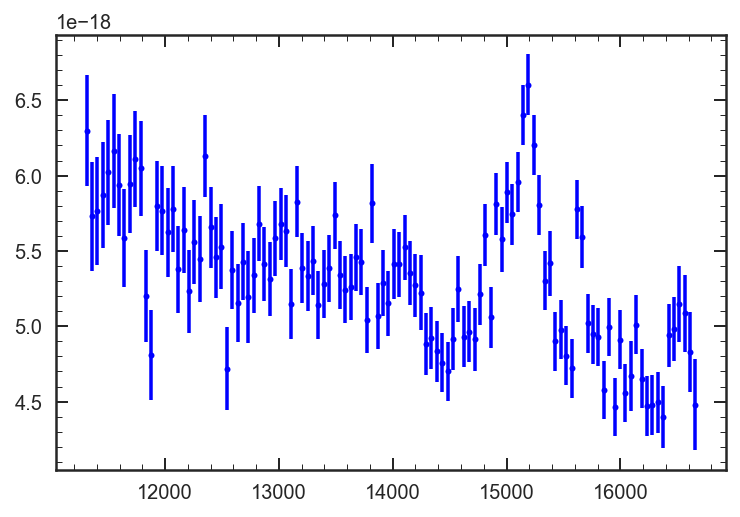

In [78]:
#gs_o30_1_39170.g141.A.fits gs_o30_2_39170.g141.A.fits gs_o30_3_39170.g141.A.fits gs_o30_4_39170.g141.A.fits
wv,fl,er = Single_spec('../beams/gs_o30_4_39170.g141.A.fits',11300,16700)
plt.errorbar(wv,fl,er,linestyle='None', marker='o', markersize=3, color='b')


In [49]:
class Gen_spec(object):
    def __init__(self, gal_id, g102_min = 8700, g102_max = 11300, g141_min = 11100, g141_max = 16700, sim = True):
        self.gal_id = gal_id
        
        self.g102_list = glob('../beams/*{0}*g102*'.format(gal_id))
        self.g141_list = glob('../beams/*{0}*g141*'.format(gal_id))
        self.g102_wv, self.g102_fl, self.g102_er = self.Stack_1d_beams(self.g102_list,g102_min,g102_max) 
        self.g141_wv, self.g141_fl, self.g141_er = self.Stack_1d_beams(self.g141_list,g141_min,g141_max) 
        
        self.Stack_g102_g141()
        
        if sim == True:
            self.Initialize_sim()
            self.g102_sens = self.Set_sensitivity(self.g102_list[0],self.g102_wv)
            self.g141_sens = self.Set_sensitivity(self.g141_list[0],self.g141_wv)

    def Single_spec(self, beam, min_wv, max_wv):
        BEAM = griz_model.BeamCutout(fits_file= beam)
       
        ivar = BEAM.ivar
        weight = np.exp(-(1*np.abs(BEAM.contam)*np.sqrt(ivar)))
            
        w, f, e = BEAM.beam.optimal_extract(BEAM.grism.data['SCI'], bin=0, ivar=BEAM.ivar)

        flat = BEAM.flat_flam.reshape(BEAM.beam.sh_beam)
        fwave,fflux,ferr = BEAM.beam.optimal_extract(flat, bin=0, ivar=BEAM.ivar)
               
        f /= fflux
        e /= fflux

        IDX= [U for U in range(len(w)) if min_wv < w[U] < max_wv]
        
        return w[IDX], f[IDX], e[IDX]
        
    def Set_sensitivity(self,beam,master_wv):    
        BEAM = griz_model.BeamCutout(fits_file= beam)
        
        flat = BEAM.flat_flam.reshape(BEAM.beam.sh_beam)
        fwave,fflux,ferr = BEAM.beam.optimal_extract(flat, bin=0, ivar=BEAM.ivar)

        return interp1d(fwave,fflux)(master_wv)
        
    def Stack_spec(self, stk_wv, flgrid, errgrid):
        #### rearrange flux grid and generate weights
        flgrid = np.transpose(flgrid)
        errgrid = np.transpose(errgrid)
        weigrid = errgrid ** (-2)
        infmask = np.isinf(weigrid) ## remove inif cause by nans in the error grid
        weigrid[infmask] = 0

        #### Stack spectra
        stack_fl, stack_er = np.zeros([2, len(stk_wv)])
        for i in range(len(stk_wv)):
            stack_fl[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
            stack_er[i] = 1 / np.sqrt(np.sum(weigrid[i]))
        
        return stk_wv, stack_fl, stack_er
        
    def Stack_1d_beams(self, beam_list, min_wv, max_wv):
        #### set master wavelength array
        wv,fl,er = self.Single_spec(beam_list[0], min_wv = min_wv, max_wv=max_wv)
        master_wv = wv[1:-1]
        
        #### intialize flux and error grid
        flgrid = np.zeros([len(beam_list), len(master_wv)])
        errgrid = np.zeros([len(beam_list), len(master_wv)])

        #### Get wv,fl,er for each spectra
        for i in range(len(beam_list)):
            wv,fl,er = self.Single_spec(beam_list[i], min_wv = min_wv, max_wv=max_wv)
            if sum(fl)>0:
                flgrid[i] = interp1d(wv, fl)(master_wv)
                errgrid[i] = interp1d(wv, er)(master_wv)
        
        return self.Stack_spec(master_wv, flgrid, errgrid)

    
    def Stack_g102_g141(self): #### good to display, but may not be good for science
        #### make combined wavelength set
        bounds = [min(self.g141_wv),max(self.g102_wv)]
        del_g102 = self.g102_wv[1] - self.g102_wv[0]
        del_g141 = self.g141_wv[1] - self.g141_wv[0]
        del_mix = (del_g102 + del_g141) / 2
        mix_wv = np.arange(bounds[0],bounds[1],del_mix)    
        stack_wv = np.append(np.append(self.g102_wv[self.g102_wv < bounds[0]],mix_wv),self.g141_wv[self.g141_wv > bounds[1]])

        #### intialize flux and error grid
        flgrid = np.zeros([2, len(stack_wv)])
        errgrid = np.zeros([2, len(stack_wv)])

        #### Get wv,fl,er for each spectra
        for i in range(len(stack_wv)):
            if min(self.g102_wv) <= stack_wv[i] <= max(self.g102_wv):
                flgrid[0][i] = interp1d(self.g102_wv, self.g102_fl)(stack_wv[i])
                errgrid[0][i] = interp1d(self.g102_wv, self.g102_er)(stack_wv[i])

            if min(self.g141_wv) <= stack_wv[i] <= max(self.g141_wv):
                flgrid[1][i] = interp1d(self.g141_wv, self.g141_fl)(stack_wv[i])
                errgrid[1][i] = interp1d(self.g141_wv, self.g141_er)(stack_wv[i])

        self.stack_wv, self.stack_fl, self.stack_er = self.Stack_spec(stack_wv, flgrid, errgrid)
        
    def Initialize_sim(self):
        #### pick out orients
        g102_beams = glob('../beams/*{0}*g102*'.format(self.gal_id))
        g102_beamid = [re.findall("o\w[0-9]+",U)[0] for U in g102_beams]
        self.g102_beamid = list(set(g102_beamid))

        g141_beams = glob('../beams/*{0}*g141*'.format(self.gal_id))
        g141_beamid = [re.findall("o\w[0-9]+",U)[0] for U in g141_beams]
        self.g141_beamid = list(set(g141_beamid))
        
        #### initialize dictionary of beams
        self.g102_beam_dict = {}
        self.g141_beam_dict = {}

        #### set beams for each orient
        for i in self.g102_beamid:
            key = i
            value = griz_model.BeamCutout(fits_file= glob('../beams/*{0}*{1}*g102*'.format(i,self.gal_id))[0])
            self.g102_beam_dict[key] = value 
            
        for i in self.g141_beamid:
            key = i
            value = griz_model.BeamCutout(fits_file= glob('../beams/*{0}*{1}*g141*'.format(i,self.gal_id))[0])
            self.g141_beam_dict[key] = value 
        
    def Sim_beam(self,BEAM, mwv, mfl, grism_wv, grism_fl, grism_er, grism_sens):
        ## Compute the models
        BEAM.beam.compute_model(spectrum_1d=[mwv, mfl], is_cgs = True)

        ## Extractions the model (error array here is meaningless)
        w, f, e = BEAM.beam.optimal_extract(BEAM.beam.model, bin=0)

        ## interpolate and scale
        f = interp1d(w,f)(grism_wv) / grism_sens
        C = Scale_model(grism_fl, grism_er,f)

        return C*f
            
    def Gen_sim(self, model_wv, model_fl, redshift): 
        ### normalize and redshift model spectra
        spec = S.ArraySpectrum(model_wv, model_fl, fluxunits='flam')
        spec = spec.redshift(redshift).renorm(1., 'flam', S.ObsBandpass('wfc3,ir,f105w'))
        spec.convert('flam')

        ### initialize model flux grids
        g102_mfl_grid = np.zeros([len(self.g102_beam_dict.keys()), len(self.g102_wv)])
        g141_mfl_grid = np.zeros([len(self.g141_beam_dict.keys()), len(self.g141_wv)])

        ### simulate each beam
        for i in range(len(self.g102_beamid)):    
            g102_mfl_grid[i] = self.Sim_beam(self.g102_beam_dict[self.g102_beamid[i]], spec.wave,spec.flux, 
                                             self.g102_wv, self.g102_fl, self.g102_er, self.g102_sens)

        for i in range(len(self.g141_beamid)):    
            g141_mfl_grid[i] = self.Sim_beam(self.g141_beam_dict[self.g141_beamid[i]], spec.wave,spec.flux, 
                                             self.g141_wv, self.g141_fl, self.g141_er, self.g141_sens)

        ### stack all sims
        self.g102_mfl = np.mean(g102_mfl_grid,axis=0)
        self.g141_mfl = np.mean(g141_mfl_grid,axis=0)

In [47]:
sum(fl) >0

False